In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/market/tr_eod_data_rounded.csv", index_col=0, parse_dates=True)
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [4]:
data.index.dtype

dtype('<M8[ns]')

로그수익률 데이터 만들기

In [5]:
rets = np.log(data / data.shift(1)) # 로그 수익률 만드는 공식
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006969,0.021342,NaN,NaN
2010-01-05,0.001961,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,0.000000,-0.001206,0.009595,-0.000911
2010-01-06,-0.016127,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.000000,0.017589,0.023999,0.016365
2010-01-07,-0.001993,-0.010454,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006969,-0.005814,-0.004876,-0.006207
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,-0.013706,-0.013820,0.229947,0.000000,-0.002755,-0.007694,-0.003746
2018-06-26,0.012330,0.006988,-0.020722,0.016660,0.000181,0.002212,0.002202,-0.084863,-0.008584,-0.005040,-0.002730,-0.005269
2018-06-27,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,-0.008319,-0.008642,0.117783,0.000000,-0.005593,-0.006399,-0.005718


로그 수익률 그래프 그리기

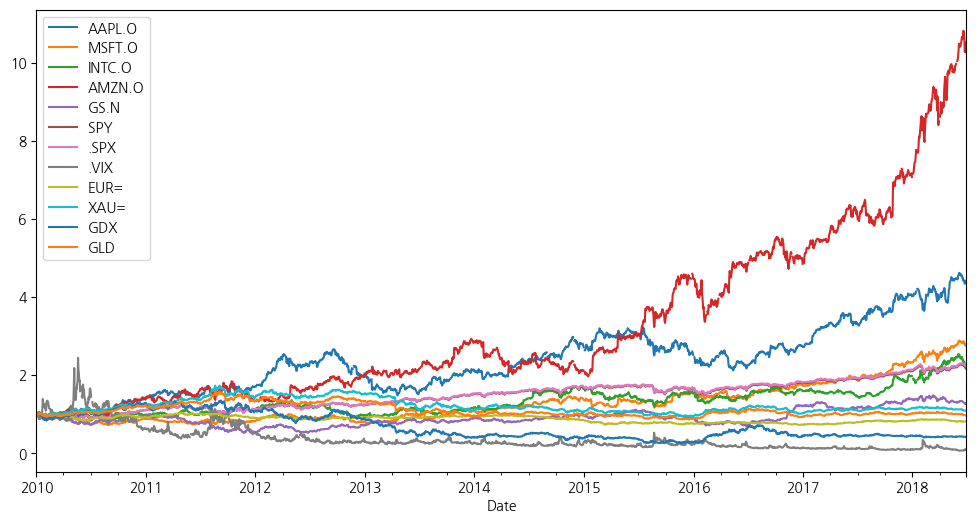

In [6]:
rets.cumsum().apply(np.exp).plot(figsize=(12,6))
plt.show()

월간 수익률 그래프

C:\Users\5-29\AppData\Local\Temp\ipykernel_10020\2027114599.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(12,6))


<Axes: xlabel='Date'>

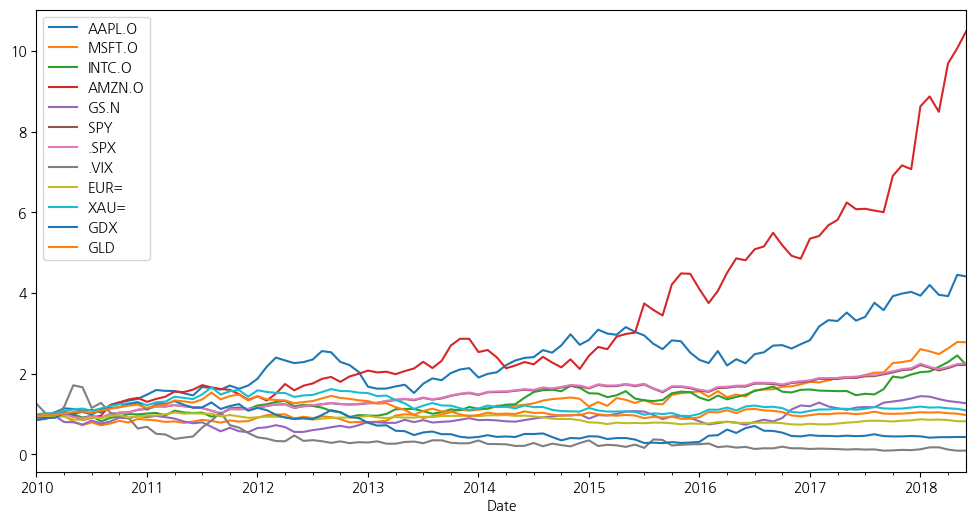

In [7]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(12,6))

애플 주식에 대한 평균 수익률 구하고 그래프 그리기

In [8]:
data.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [9]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data

,AAPL.O
Date,
2010-01-04,30.57
2010-01-05,30.63
2010-01-06,30.14
2010-01-07,30.08
2010-01-08,30.28
...,...
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16


20일간의 애플주식 rolling 지표 구하기

In [12]:
window = 20

In [14]:
data['min']= data[sym].rolling(window).min()  # 20일 기간의 이동 최저값
data['mean']= data[sym].rolling(window).mean() # 20일 간의 이동 평균
data['std']= data[sym].rolling(window).std() # 20일 간의 이동 표준편차
data['median']= data[sym].rolling(window).median() # 20일 간의 이동 중앙값
data['max']= data[sym].rolling(window).max() # 20일 간의 이동 중앙값
data['ewma']= data[sym].ewm(halflife=0.5, min_periods=window).mean() # 20일 간의 이동 가중 평균
data

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-01-04,30.57,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.63,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.14,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-06-25,182.17,182.17,189.2060,3.262549,189.54,193.98,182.907462
2018-06-26,184.43,182.17,189.0325,3.423931,189.54,193.98,184.049366
2018-06-27,184.16,182.17,188.8655,3.580486,189.54,193.98,184.132341


In [15]:
data = data.dropna()
data

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.82,27.44,29.5810,0.933313,29.820,30.72,27.807013
2010-02-02,27.98,27.44,29.4515,0.967908,29.710,30.72,27.936753
2010-02-03,28.46,27.44,29.3430,0.950314,29.685,30.72,28.329188
2010-02-04,27.44,27.44,29.2080,1.020333,29.545,30.72,27.662297
2010-02-05,27.92,27.44,29.1000,1.037350,29.420,30.72,27.855574
...,...,...,...,...,...,...,...
2018-06-25,182.17,182.17,189.2060,3.262549,189.540,193.98,182.907462
2018-06-26,184.43,182.17,189.0325,3.423931,189.540,193.98,184.049366
2018-06-27,184.16,182.17,188.8655,3.580486,189.540,193.98,184.132341


애플 주가 데이터 시각화 최근데이터 200개만 시각화

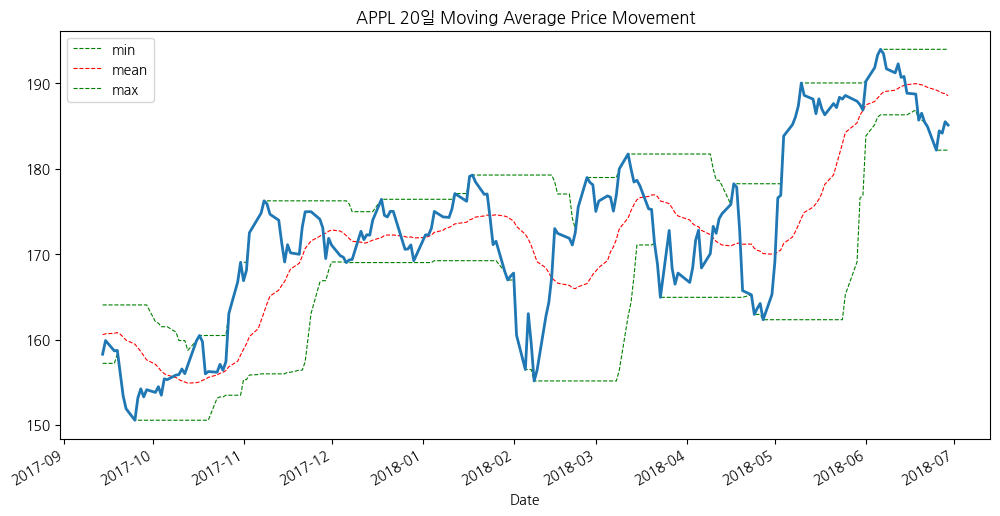

In [18]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(12,6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)
plt.title("APPL 20일 Moving Average Price Movement")
plt.show()

# 자본시장 시계열의 기술적 분석
* 단기 이동 평균 42일 - 2달
* 장기 이동 평균 252일 - 1년

In [21]:
data['short_ma'] = data[sym].rolling(window=42).mean() # 단기 이동평균 2달
data['long_ma'] = data[sym].rolling(window=252).mean() # 장기 이동평균 1년
data

C:\Users\5-29\AppData\Local\Temp\ipykernel_10020\168616574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['short_ma'] = data[sym].rolling(window=42).mean() # 단기 이동평균 2달
C:\Users\5-29\AppData\Local\Temp\ipykernel_10020\168616574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['long_ma'] = data[sym].rolling(window=252).mean() # 장기 이동평균 1년


,AAPL.O,min,mean,std,median,max,ewma,short_ma,long_ma
Date,,,,,,,,,
2010-02-01,27.82,27.44,29.5810,0.933313,29.820,30.72,27.807013,NaN,NaN
2010-02-02,27.98,27.44,29.4515,0.967908,29.710,30.72,27.936753,NaN,NaN
2010-02-03,28.46,27.44,29.3430,0.950314,29.685,30.72,28.329188,NaN,NaN
2010-02-04,27.44,27.44,29.2080,1.020333,29.545,30.72,27.662297,NaN,NaN
2010-02-05,27.92,27.44,29.1000,1.037350,29.420,30.72,27.855574,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,182.17,189.2060,3.262549,189.540,193.98,182.907462,185.606190,168.265556
2018-06-26,184.43,182.17,189.0325,3.423931,189.540,193.98,184.049366,186.087381,168.418770
2018-06-27,184.16,182.17,188.8655,3.580486,189.540,193.98,184.132341,186.607381,168.579206


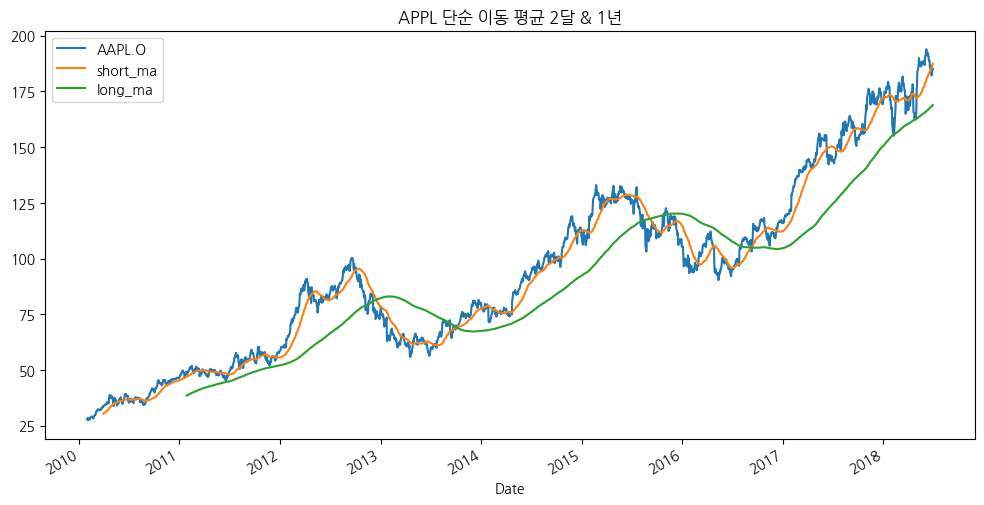

In [22]:
data[[sym, 'short_ma', 'long_ma']].plot(figsize=(12,6))
plt.title("APPL 단순 이동 평균 2달 & 1년")
plt.legend()
plt.show()

## 골든 크로스(Golden Cross) 
* 단기 이동평균선이 장기 이동 평균선을 아래에서 위로 교차할 때
* 상승장의 시작을 알리는 신호
  * 단기 이동 평균선: 보통 50일 이동 평균선을 사용
  * 장기 이동 평균선: 보통 200일 이동 평균선을 사용
## 데드 크로스(Dead Cross)
* 단기 이동 평균선이 장기 이동 평균선을 위에서 아래로 교차할 때
* 하락장을 알리는 신호
  * 단기 이동 평균선: 보통 50일 이동 평균선을 사용
  * 장기 이동 평균선: 보통 200일 이동 평균선을 사용

C:\Users\5-29\AppData\Local\Temp\ipykernel_10020\1891929960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['positions'] = np.where(data['short_ma'] > data['long_ma'], 1, -1) # 1 = 상승장 매수, -1 = 하락장 매도


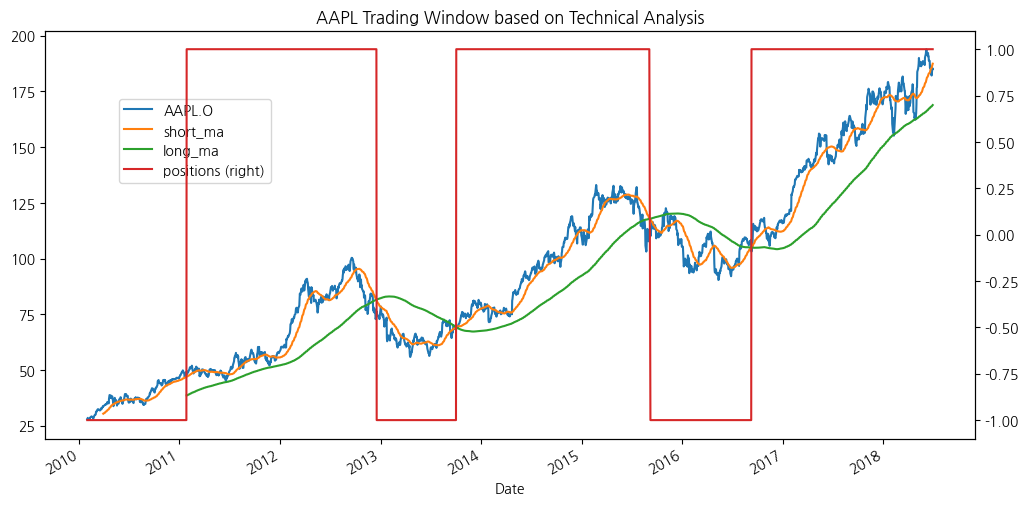

In [23]:
# 골든 크로스와 데드 크로스 그래프 같이 그리기
data['positions'] = np.where(data['short_ma'] > data['long_ma'], 1, -1) # 1 = 상승장 매수, -1 = 하락장 매도
ax = data[[sym, 'short_ma', 'long_ma', 'positions']].plot(figsize=(12,6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
plt.title("AAPL Trading Window based on Technical Analysis")
plt.show()